In [1]:
# 1️ IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier




In [2]:
# 2️ LOAD DATASET
df = pd.read_csv('train.csv')
print("Dataset Loaded Successfully! \n")
display(df.head())






Dataset Loaded Successfully! 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 3️ DATA UNDERSTANDING
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print(df.describe())




Dataset Shape: (891, 12)
Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32

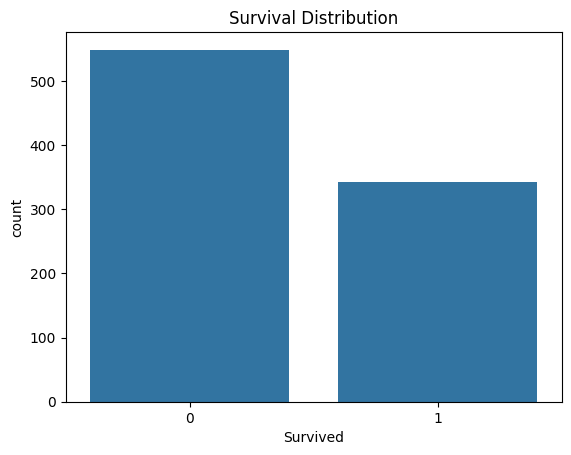

In [4]:
# 4 DATA VISUALIZATION (EDA)
# Survived Count Plot
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()



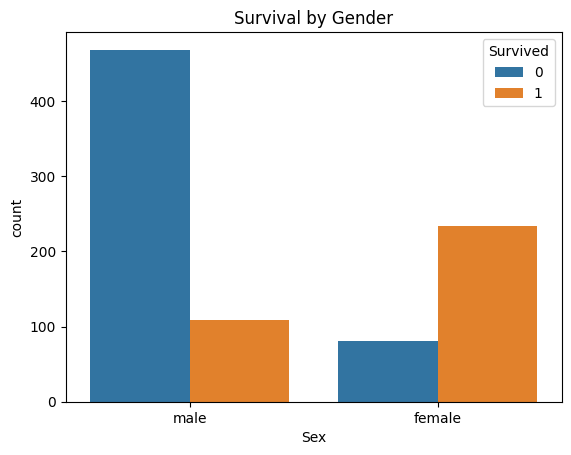

In [5]:
# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()



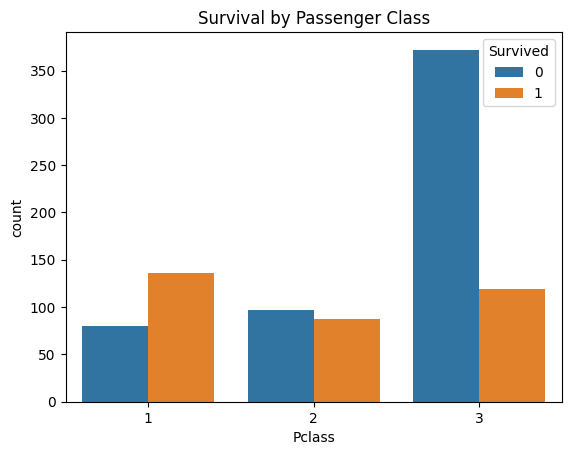

In [6]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()




In [7]:
# 5️ DROP IRRELEVANT COLUMNS
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)




In [8]:

# 6️ HANDLE MISSING VALUES
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\nMissing Values After Fill:\n", df.isnull().sum())





Missing Values After Fill:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\EMAMUL\AppData\Local\Temp\ipykernel_4812\610950237.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\EMAMUL\AppData\Local\Temp\ipykernel_4812\610950237.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [9]:
# 7️ ENCODE CATEGORICAL VARIABLES
df['Sex'] = df['Sex'].map({'male':1, 'female':0})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)




In [10]:


# 8️ FEATURE SELECTION
X = df.drop('Survived', axis=1)
y = df['Survived']


In [11]:

# 9️ TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
# 10️ FEATURE SCALING
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [13]:
# 11 LOGISTIC REGRESSION MODEL
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("\n Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


 Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [14]:
# 12 RANDOM FOREST MODEL
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("\n Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


 Random Forest Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



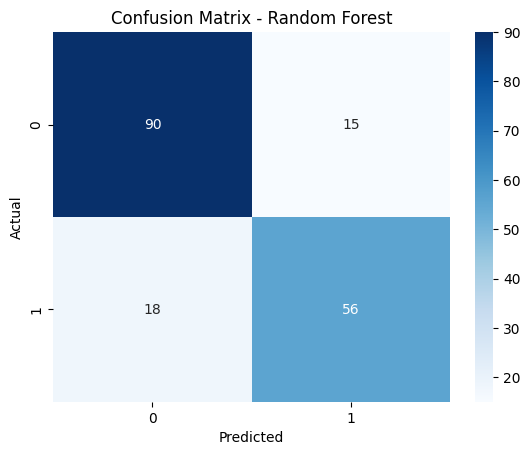

In [15]:
# 13 CONFUSION MATRIX VISUALIZATION
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# 14️ PREDICT CUSTOM PASSENGER
# Features order: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked_Q, Embarked_S
test_person = np.array([[3, 1, 22, 1, 0, 7.25, 0, 1]])  # Example passenger
test_person_scaled = scaler.transform(test_person)
prediction = rf_model.predict(test_person_scaled)[0]

print("\nPassenger Survival Prediction →", "Survived" if prediction==1 else "Not Survived")

#############################################
print("\n Titanic ML Project Successfully Completed!")


Passenger Survival Prediction → Not Survived

 Titanic ML Project Successfully Completed!


C:\Users\EMAMUL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
# 15 TRAIN SVM & SAVE (Updated)
from sklearn.svm import SVC
import pickle

# Train SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# model and scaler with save 
pickle.dump(svm_model, open('svm_model_for_something.sav', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

print(" Model and Scaler saved successfully!")


 Model and Scaler saved successfully!
